###  Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Loading datasets

In [ ]:
x = pd.read_csv('cancer.csv')
x.drop('id',axis=1,inplace=True)
x.drop('Unnamed: 32',axis=1,inplace=True)
x.drop('diagnosis',axis=1,inplace=True)

### Function to calculate distance and get neighborhood

In [ ]:
def getNeighbours(data, minPoint, eps):
    
    def EuclideanDistance(x, y):
        return  np.sqrt(np.sum(np.square(x - y)))
    
    neighbours = []
    
    for i in range(len(data)):
        dist = EuclideanDistance(data[i], data[minPoint])
        
        if dist < eps:
            neighbours.append(i)
            
    return neighbours

### DBSCAN Implementation

In [ ]:
def dbScanAlgo(data, eps, MinPts):
  # Function determined to grow the cluster
    def gCluster(data, labels, inPoint, 
                    neighbours, clusterID, eps, MinPts):
        labels[inPoint] = clusterID
        i = 0
        while i < len(neighbours):    
            nh = neighbours[i]

            if labels[nh] == -1:
                labels[nh] = clusterID
            elif labels[nh] == 0:
                labels[nh] = clusterID
                PnNeighbours = getNeighbours(data, nh, eps)

                if len(PnNeighbours) >= MinPts:
                    neighbours = neighbours + PnNeighbours
            i += 1
            
    labels = np.zeros(len(data))
    clusterID = 0
    
    for p in range(len(data)):
        if labels[p] == 0:
            neighbours = getNeighbours(data, p, eps)
            
            if len(neighbours) < MinPts:
                labels[p] = -1
            else:
                clusterID += 1
                gCluster(data, labels, p, neighbours, 
                            clusterID, eps, MinPts)
                
    return labels

### Function to calculate noise and number of clusters

In [ ]:
def numNoise(labels):
    return int(abs(np.sum(labels[labels < 0])))
    
def nClusters(labels):
    return len(np.unique(labels[labels > 0]))

### Actual data

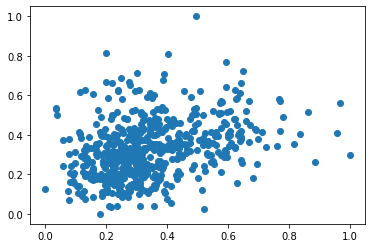

In [ ]:
for column in x.columns:
    x.loc[:, column] = (x[column].values - x[column].min())/(x[column].max() - x[column].min())
    
plt.scatter(x['radius_mean'],x['texture_mean'])
plt.show()

### Assignment Task (iv): 1.Eps = 0.2, minPoints = 6

number of clusters = 1
number of noise points = 562


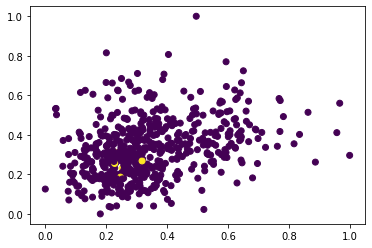

In [ ]:
labels = dbScanAlgo(x.values, 0.2, 6)#Assigned here
numClusters = nClusters(labels)
print('number of clusters = {}'.format(numClusters))
print('number of noise points = {}'.format(numNoise(labels)))
plt.scatter(x['radius_mean'],x['texture_mean'], c = labels)
plt.show()

### Assignment Task (iv):2.Eps = 0.5, minPonts = 6

number of clusters = 1
number of noise points = 65


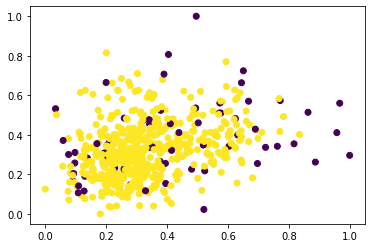

In [ ]:
labels = dbScanAlgo(x.values, 0.5, 6)#Assigned here
numClusters = nClusters(labels)
print('number of clusters = {}'.format(numClusters))
print('number of noise points = {}'.format(numNoise(labels)))
plt.scatter(x['radius_mean'],x['texture_mean'], c = labels)
plt.show()

### Assignment Task (iv):3. Eps = 0.2, minPoints = 3

number of clusters = 7
number of noise points = 527


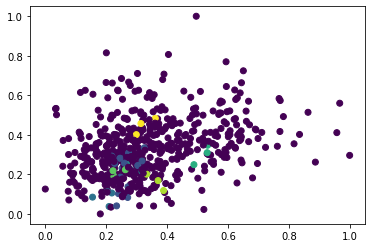

In [ ]:
labels = dbScanAlgo(x.values, 0.2, 3)#Assigned here
numClusters = nClusters(labels)
print('number of clusters = {}'.format(numClusters))
print('number of noise points = {}'.format(numNoise(labels)))
plt.scatter(x['radius_mean'],x['texture_mean'], c = labels)
plt.show()